# ex2

## imports

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io
import pandas as pd
from statsmodels.tsa.api import VAR

## task 2: multivariate VAR processes

### read

In [7]:
raw = scipy.io.loadmat('./ex2.mat')
data = dict()
for key, value in raw.items():
  if key[0] != '_':
    data[key] = value.reshape(-1)
df = pd.DataFrame(data)

### plot

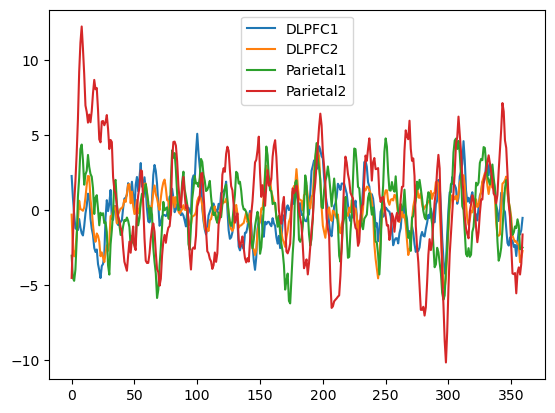

In [8]:
df.plot()
plt.show()

### model

In [9]:
model = VAR(df)
results = model.fit(1)
A = results.coefs[0]
print(df.columns)
print(A)
print(A - A.T)

Index(['DLPFC1', 'DLPFC2', 'Parietal1', 'Parietal2'], dtype='object')
[[ 0.90668653 -0.02035257  0.01568962 -0.03375742]
 [ 0.00975233  0.89853182 -0.00518382 -0.00724422]
 [-0.01223154  0.04526295  0.87266454  0.00158463]
 [ 0.15398133 -0.0979815   0.01444375  0.93634082]]
[[ 0.         -0.0301049   0.02792116 -0.18773876]
 [ 0.0301049   0.         -0.05044677  0.09073727]
 [-0.02792116  0.05044677  0.         -0.01285912]
 [ 0.18773876 -0.09073727  0.01285912  0.        ]]


Coupling between $\mathrm{DLPFC}_i$ and $\mathrm{Parietal}_i$ is directed
towards DLPFC; For $\mathrm{DLPFC}_i$ and $\mathrm{Parietal}_j$ ($i \neq j$)
it's directed towards the parietal cortex.

### stationarity

In [10]:
print(results.is_stable()) # built in thing
print(np.all(np.abs(np.linalg.eig(A).eigenvalues) < 1))

True
True


## task 3: ar poisson processes

In [11]:
T = 1000
A1 = np.array([[0.2, -0.1], [0.1, 0.1]])
A2 = np.array([[0.1, -0.1], [0.1, 0.1]])
mu0 = np.array([0.5, 0.5])
a0 = np.array([0.0, 0.0])

y = [[0,0], mu0]
l = list()

for i in range(T):
  l.append(np.exp(A1@y[-1] + A2@y[-2] + a0))
  y.append(np.random.poisson(l[-1]))